In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!nvidia-smi

Wed Sep 22 08:21:31 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.63.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8    31W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15308, done.
remote: Total 15308 (delta 0), reused 0 (delta 0), pack-reused 15308
Receiving objects: 100% (15308/15308), 13.70 MiB | 17.49 MiB/s, done.
Resolving deltas: 100% (10402/10402), done.


# New Section

In [4]:
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [5]:
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_

In [6]:
!cp cfg/yolov4-tiny.cfg cfg/yolov4-tiny_training.cfg

In [7]:
!sed -i 's/batch=1/batch=64/' cfg/yolov4-tiny_training.cfg
!sed -i 's/subdivisions=1/subdivisions=16/' cfg/yolov4-tiny_training.cfg
!sed -i 's/max_batches = 2000200/max_batches = 2000/' cfg/yolov4-tiny_training.cfg
# cfg and change steps to 80% & 90% of max_batches
!sed -i '229 s@classes=80@classes=1@' cfg/yolov4-tiny_training.cfg
!sed -i '280 s@classes=80@classes=1@' cfg/yolov4-tiny_training.cfg
# filters formula = (5+numclasses)*3
!sed -i '221 s@filters=255@filters=18@' cfg/yolov4-tiny_training.cfg
!sed -i '274 s@filters=255@filters=18@' cfg/yolov4-tiny_training.cfg

In [8]:
!pwd

/content/darknet


In [9]:
%cd /content/drive/MyDrive/NumberPlateDetection

/content/drive/MyDrive/NumberPlateDetection


In [10]:
!unzip /content/drive/MyDrive/NumberPlateDetection/Data_Set_Number_Plate/HighwayData-20210915T135128Z-001.zip

Archive:  /content/drive/MyDrive/NumberPlateDetection/Data_Set_Number_Plate/HighwayData-20210915T135128Z-001.zip
replace HighwayData/25032021173320667522.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace HighwayData/25032021173306584039.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace HighwayData/25032021173306584039.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [11]:
%cd /content/darknet/data

/content/darknet/data


In [12]:
!python /content/create-txt.py

In [13]:
%cd ..

/content/darknet


In [14]:
!mv train.txt /content/darknet/data/train.txt
!mv valid.txt /content/darknet/data/valid.txt

mv: cannot stat 'train.txt': No such file or directory
mv: cannot stat 'valid.txt': No such file or directory


In [15]:
!echo -e 'Number Plate' > data/obj.names
!mkdir data/backup
!echo -e 'classes= 1\ntrain  = data/train.txt\nvalid  = data/valid.txt\nnames = data/obj.names\nbackup = data/backup/' > data/obj.data

In [16]:
!cp cfg/yolov4-tiny_training.cfg data/backup/yolov4-tiny_training.cfg
!cp data/obj.names data/backup/classes.txt

In [17]:
!./darknet detector train data/obj.data cfg/yolov4-tiny_training.cfg yolov4-tiny.conv.29 -dont_show

Streaming output truncated to the last 5000 lines.
 total_bbox = 131786, rewritten_bbox = 0.000000 % 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 30 Avg (IOU: 0.000000), count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 37 Avg (IOU: 0.839129), count: 6, class_loss = 0.015447, iou_loss = 12.220095, total_loss = 12.235541 
 total_bbox = 131792, rewritten_bbox = 0.000000 % 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 30 Avg (IOU: 0.000000), count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 37 Avg (IOU: 0.727389), count: 5, class_loss = 0.109130, iou_loss = 11.516973, total_loss = 11.626102 
 total_bbox = 131797, rewritten_bbox = 0.000000 % 

 1903: 0.062239, 0.059973 avg loss, 0.002610 rate, 1.825605 seconds, 121792 images, 0.116516 hours left
Loaded: 0.36937

In [18]:
import cv2
from google.colab.patches import cv2_imshow


def display_pred():
  im = cv2.imread('predictions.jpg')
  im = cv2.cvtColor(im ,cv2.COLOR_BGR2RGB)
  cv2_imshow(im)

In [19]:
!wget https://emerging-europe.com/wp-content/uploads/2018/07/maxresdefault-990x556-1.jpg -O test.jpg

--2021-09-22 09:52:28--  https://emerging-europe.com/wp-content/uploads/2018/07/maxresdefault-990x556-1.jpg
Resolving emerging-europe.com (emerging-europe.com)... 95.216.1.236
Connecting to emerging-europe.com (emerging-europe.com)|95.216.1.236|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 346778 (339K) [image/jpeg]
Saving to: ‘test.jpg’

test.jpg            100%[===================>] 338.65K  --.-KB/s    in 0.1s    

2021-09-22 09:52:28 (2.36 MB/s) - ‘test.jpg’ saved [346778/346778]



In [22]:
!./darknet detector test data/obj.data cfg/yolov4-tiny_training.cfg data/backup/yolov4-tiny_training_last.weights test.jpg -thresh 0.6

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 2    416 x 416 x   3 ->  208 x 208 x  32 0.075 BF
   1 conv     64       3 x 3/ 2    208 x 208 x  32 ->  104 x 104 x  64 0.399 BF
   2 conv     64       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.797 BF
   3 route  2 		                       1/2 ->  104 x 104 x  32 
   4 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   5 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   6 route  5 4 	                           ->  104 x 104 x  64 
   7 conv     64       1 x 1/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.089 BF
   8 route  2 7 	                           ->  1

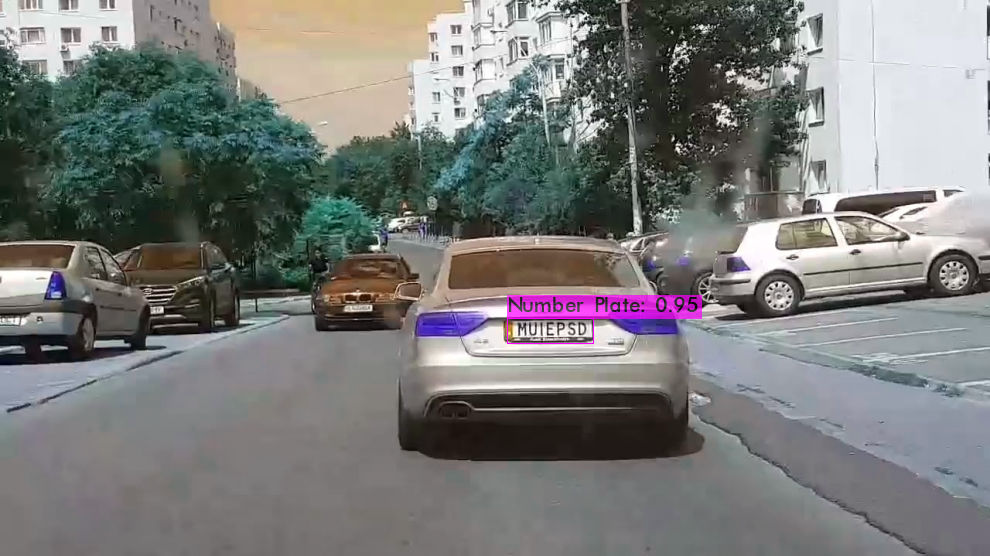

In [23]:
display_pred()